<a href="https://colab.research.google.com/github/draganovik/pppo-lego-class/blob/main/LEGO_Klasifikacija_Mladen_Draganovic_IT68g2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Univerzitet u Novom Sadu_

_Fakultet tehničkih nauka_

_Departman za industrijsko inženjerstvo i menadžment_

_Principi prezentacije i prepoznavanja oblika_

<br>
<br>

# Projektni zadatak: Klasifikacija - Lego figure

_Mladen Draganović IT68/2019_

<br>
<br>

---
Novi Sad, jul 2023.

## Uvod

Cilj ovog projekta je razvoj efikasnog sistema klasifikacije Lego figura karaktera heroja iz popularnih umetničkih sadržaja: Hari Poter, Marvel, Ratovi Zvezda i Svet Jure. Pri klasifikovanju javljaju se različiti izazovi zbog raznolikosti karakteristika Lego figura i složenih detalja na figurama. Pri rešavanju ovog zadatka fokus je na primeni DenseNet121 arhitekture, koja je deo Keras aplikacija. Upotreba DenseNet121 omogućava iskorišćenje prednosti gustih veza i efikasne obrade karakterističnih obeležja kako bi se postigla visoka preciznost u klasifikaciji Lego figura.

## Izvorni podaci
Podaci potrebni za ovaj projekat su preuzeti kao zip datoteka sa Google Drive platforme. Nakon preuzimanja, izvršena je dekompresija zip datoteke i podaci su smešteni na radnoj lokaciji.

Izvorni podaci sadrže direktorijum sa slikama Lego figura, kao i CSV fajlove sa metapodacima o slikama i njihovim klasama/imenima.

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1C40v-MMPUYKINKRtSlEwtFfjijwEc4Zl' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1C40v-MMPUYKINKRtSlEwtFfjijwEc4Zl" -O data.zip && rm -rf /tmp/cookies.txt

--2023-07-04 22:13:08--  https://docs.google.com/uc?export=download&confirm=t&id=1C40v-MMPUYKINKRtSlEwtFfjijwEc4Zl
Resolving docs.google.com (docs.google.com)... 64.233.187.113, 64.233.187.100, 64.233.187.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.187.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pgb2hbeo65f8qc6tosjt35uup60qhcf1/1688508750000/06145252528509741365/*/1C40v-MMPUYKINKRtSlEwtFfjijwEc4Zl?e=download&uuid=ff011d79-9468-4b73-9a1d-df21ce4d534d [following]
--2023-07-04 22:13:09--  https://doc-0s-70-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pgb2hbeo65f8qc6tosjt35uup60qhcf1/1688508750000/06145252528509741365/*/1C40v-MMPUYKINKRtSlEwtFfjijwEc4Zl?e=download&uuid=ff011d79-9468-4b73-9a1d-df21ce4d534d
Resolving doc-0s-70-docs.googleusercontent.com (doc-0s-70-docs.googleusercontent.com)... 64.233.187.132, 

In [ ]:
!unzip -o data.zip

Archive:  data.zip
  inflating: LICENSE                 
  inflating: harry-potter/0001/001.jpg  
  inflating: harry-potter/0001/002.jpg  
  inflating: harry-potter/0001/003.jpg  
  inflating: harry-potter/0001/004.jpg  
  inflating: harry-potter/0001/005.jpg  
  inflating: harry-potter/0001/006.jpg  
  inflating: harry-potter/0001/007.jpg  
  inflating: harry-potter/0001/008.jpg  
  inflating: harry-potter/0001/009.jpg  
  inflating: harry-potter/0001/010.jpg  
  inflating: harry-potter/0001/011.jpg  
  inflating: harry-potter/0001/012.jpg  
  inflating: harry-potter/0001/013.jpg  
  inflating: harry-potter/0002/001.jpg  
  inflating: harry-potter/0002/002.jpg  
  inflating: harry-potter/0002/003.jpg  
  inflating: harry-potter/0002/004.jpg  
  inflating: harry-potter/0002/005.jpg  
  inflating: harry-potter/0002/006.jpg  
  inflating: harry-potter/0002/007.jpg  
  inflating: harry-potter/0002/008.jpg  
  inflating: harry-potter/0002/009.jpg  
  inflating: harry-potter/0002/010.jpg  


## Postavka projekta
Kako bi se započela analiza i obrada podataka, prvo se uvoze potrebne biblioteke. Koristeći biblioteku Pandas, učitavaju se CSV fajlovi sa metapodacima o slikama i njihovim klasama. Nakon toga, prikazuje se nekoliko uzoraka slika iz različitih klasa kako bi se dobio uvid u sadržaj podataka. Takođe, povezuju se slike sa odgovarajućim klasama, kako bi se kasnije izvršila klasifikacija Lego figurica.

In [ ]:
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd

Prikaz uzorka slika radi provere uspešnosti preuzetih izvornih podataka.

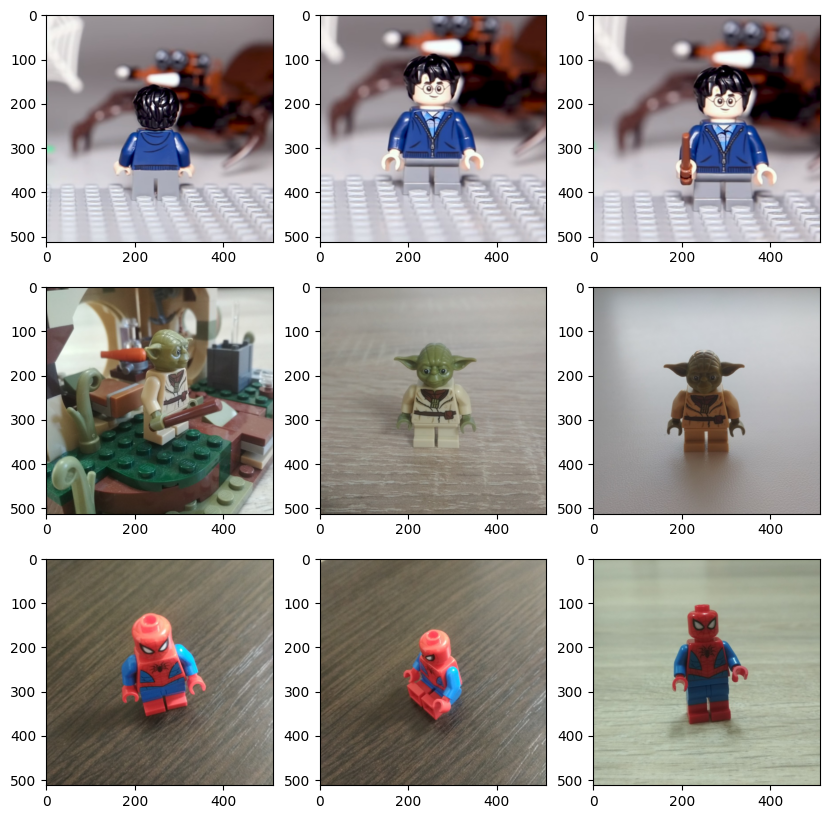

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        image_path = '{}/0001/{}.jpg'.format(['harry-potter', 'star-wars', 'marvel'][i], str(int(j+1)).zfill(3))
        axs[i, j].imshow(mpimg.imread(image_path))

Učitavanje index.csv fajla koji sadrži oznake (numeričku oznaku `class_id`) za svaku sliku.

In [ ]:
index_csv = pd.read_csv('index.csv')
index_csv

path  class_id
0       marvel/0001/001.jpg         1
1       marvel/0001/002.jpg         1
2       marvel/0001/003.jpg         1
3       marvel/0001/004.jpg         1
4       marvel/0001/005.jpg         1
..                      ...       ...
366  star-wars/0017/006.jpg        38
367  star-wars/0017/007.jpg        38
368  star-wars/0017/008.jpg        38
369  star-wars/0017/009.jpg        38
370  star-wars/0017/010.jpg        38

[371 rows x 2 columns]

Na isti način vrši se i učitavanje metadata.csv gde se nalaze imena figura određene numeričke oznake.

In [ ]:
metadata_csv = pd.read_csv('metadata.csv', encoding='ISO-8859-1')
metadata_csv

class_id lego_ids                             lego_names  \
0          1  [76115]              ['Spider Mech vs. Venom']   
1          2  [76115]              ['Spider Mech vs. Venom']   
2          3  [76115]              ['Spider Mech vs. Venom']   
3          4  [76115]              ['Spider Mech vs. Venom']   
4          5  [75208]                         ["Yoda's Hut"]   
5          6  [75208]                         ["Yoda's Hut"]   
6          7  [75208]                         ["Yoda's Hut"]   
7          8  [75199]   ["General Grievous' Combat Speeder"]   
8          9  [75199]   ["General Grievous' Combat Speeder"]   
9         10  [75264]    ["Kylo Ren's Shuttle Microfighter"]   
10        11  [75254]  ["AT-ST Raider from The Mandalorian"]   
11        12  [75254]  ["AT-ST Raider from The Mandalorian"]   
12        13  [75254]  ["AT-ST Raider from The Mandalorian"]   
13        14  [75254]  ["AT-ST Raider from The Mandalorian"]   
14        15  [76128]                  ["Molten Man Battle"]   
15        16  [76128]                  ["Molten Man Battle"]   
16        17  [76128]                  ["Molten Man Battle"]   
17        18  [75950]                      ["Aragog's Lair"]   
18        19  [75950]                      ["Aragog's Lair"]   
19        20  [76162]     ["Black Widow's Helicopter Chase"]   
20        21  [76162]     ["Black Widow's Helicopter Chase"]   
21        22  [76162]     ["Black Widow's Helicopter Chase"]   
22        23  [76123]  ["Captain America: Outriders Attack"]   
23        24  [76123]  ["Captain America: Outriders Attack"]   
24        25  [76123]  ["Captain America: Outriders Attack"]   
25        26  [75926]                   ["Pteranodon Chase"]   
26        27  [75926]                   ["Pteranodon Chase"]   
27        28  [76125]             ["Iron Man Hall of Armor"]   
28        29  [76125]             ["Iron Man Hall of Armor"]   
29        30  [76125]             ["Iron Man Hall of Armor"]   
30        31  [76125]             ["Iron Man Hall of Armor"]   
31        32  [75273]       ["Poe Dameron's X-wing Fighter"]   
32        33   [7104]                       ["Desert Skiff"]   
33        34  [75183]         ["Darth Vader Transformation"]   
34        35  [75183]         ["Darth Vader Transformation"]   
35        36  [75183]         ["Darth Vader Transformation"]   
36        37  [75269]                   ["Duel on Mustafar"]   
37        38  [75312]               ["Boba Fetts Starship"]   

                minifigure_name  
0                    SPIDER-MAN  
1                         VENOM  
2                      AUNT MAY  
3                  GHOST SPIDER  
4                          YODA  
5                LUKE SKYWALKER  
6                         R2-D2  
7                    MACE WINDU  
8              GENERAL GRIEVOUS  
9                      KYLO REN  
10              THE MANDALORIAN  
11                    CARA DUNE  
12         KLATOOINIAN RAIDER 1  
13         KLATOOINIAN RAIDER 2  
14                     MYSTERIO  
15                  FIREFIGHTER  
16                   SPIDER-MAN  
17                 HARRY POTTER  
18                  RON WEASLEY  
19                  BLACK WIDOW  
20                YELENA BELOVA  
21                   TASKMASTER  
22              CAPTAIN AMERICA  
23                   OUTRIDER 1  
24                   OUTRIDER 2  
25                   OWEN GRADY  
26  TRACKER TRAQUEUR RASTREADOR  
27                IRON MAN MK 1  
28                IRON MAN MK 5  
29               IRON MAN MK 41  
30               IRON MAN MK 50  
31                       JANNAH  
32                     HAN SOLO  
33                  DARTH VADER  
34             ANAKIN SKYWALKER  
35            EMPEROR PALPATINE  
36               OBI-WAN KENOBI  
37                    BOBA FETT

Spajanje prethodnih podataka po `class_id` kako bi se dobili mapa lokacije slike i ime figure po numeričkoj oznaci.

In [ ]:
image_data = pd.merge(index_csv, metadata_csv[['class_id', 'minifigure_name']], on='class_id')
image_data

path  class_id minifigure_name
0       marvel/0001/001.jpg         1      SPIDER-MAN
1       marvel/0001/002.jpg         1      SPIDER-MAN
2       marvel/0001/003.jpg         1      SPIDER-MAN
3       marvel/0001/004.jpg         1      SPIDER-MAN
4       marvel/0001/005.jpg         1      SPIDER-MAN
..                      ...       ...             ...
366  star-wars/0017/006.jpg        38       BOBA FETT
367  star-wars/0017/007.jpg        38       BOBA FETT
368  star-wars/0017/008.jpg        38       BOBA FETT
369  star-wars/0017/009.jpg        38       BOBA FETT
370  star-wars/0017/010.jpg        38       BOBA FETT

[371 rows x 3 columns]

Prikaz slike i naziva figura u odnosu za manipulisane podatke.

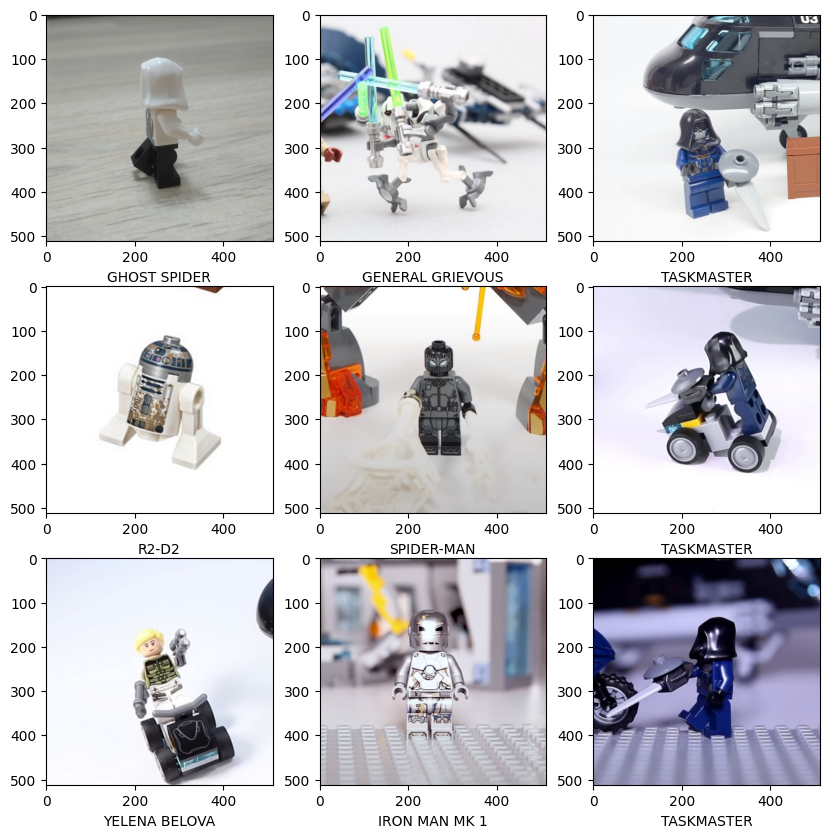

In [ ]:
from tensorflow.keras.utils import load_img

image_data_sample=image_data.sample(9)

plt.subplots(3,3, figsize=(10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    img=load_img(image_data_sample['path'].values[i])
    plt.imshow(img)
    plt.xlabel(image_data_sample['minifigure_name'].values[i])
plt.show()

Za testiranje modela potrebna je izolovana kolekcija test slika. Test podaci su dostupni na /test direktorijumu, iz izvornih podataka.

In [ ]:
test_csv = pd.read_csv('test.csv')
test_data = test_csv.drop(columns = ['class_id'])
test_data

path
0   test/001.jpg
1   test/002.jpg
2   test/003.jpg
3   test/004.jpg
4   test/005.jpg
..           ...
74  test/075.jpg
75  test/076.jpg
76  test/077.jpg
77  test/078.jpg
78  test/079.jpg

[79 rows x 1 columns]

Klase imena (oznake) test slika su smeštane u `test_labels`.

In [ ]:
test_labels = test_csv['class_id']
test_labels

0     32
1     32
2     32
3     32
4      1
      ..
74    37
75    37
76    38
77    38
78    38
Name: class_id, Length: 79, dtype: int64

Kreiranje mape slika/ime figure i za test podatke, kako bi se kasnije analizirali rezultati koje model predvidi.

In [ ]:
test_data_labeled = pd.merge(test_csv, metadata_csv[['class_id', 'minifigure_name']], on='class_id')
test_data_labeled = test_data_labeled.sort_values('path')
test_data_labeled

path  class_id minifigure_name
0   test/001.jpg        32          JANNAH
1   test/002.jpg        32          JANNAH
2   test/003.jpg        32          JANNAH
3   test/004.jpg        32          JANNAH
4   test/005.jpg         1      SPIDER-MAN
..           ...       ...             ...
74  test/075.jpg        37  OBI-WAN KENOBI
75  test/076.jpg        37  OBI-WAN KENOBI
76  test/077.jpg        38       BOBA FETT
77  test/078.jpg        38       BOBA FETT
78  test/079.jpg        38       BOBA FETT

[79 rows x 3 columns]

Priprema podataka za model.

In [ ]:
X_data = image_data.drop(columns = ['class_id'])
X_data

path minifigure_name
0       marvel/0001/001.jpg      SPIDER-MAN
1       marvel/0001/002.jpg      SPIDER-MAN
2       marvel/0001/003.jpg      SPIDER-MAN
3       marvel/0001/004.jpg      SPIDER-MAN
4       marvel/0001/005.jpg      SPIDER-MAN
..                      ...             ...
366  star-wars/0017/006.jpg       BOBA FETT
367  star-wars/0017/007.jpg       BOBA FETT
368  star-wars/0017/008.jpg       BOBA FETT
369  star-wars/0017/009.jpg       BOBA FETT
370  star-wars/0017/010.jpg       BOBA FETT

[371 rows x 2 columns]

Priprema oznaka za model.

In [ ]:
y_data = image_data['class_id']
y_data

0       1
1       1
2       1
3       1
4       1
       ..
366    38
367    38
368    38
369    38
370    38
Name: class_id, Length: 371, dtype: int64

## Normalizacija i priprema podataka

Funkcija `train_test_split` je korišćena za podelu ulaznih podataka `X_data` i ciljnih vrednosti `y_data` na četiri podskupa: `X_train`, `X_val`, `y_train` i `y_val`. Parametar `test_size` je postavljen na 0.20, što znači da će se 20% podataka koristiti za validaciju, dok se preostalih 80% koristi za obuku modela. Parametar `random_state` je postavljen na 8 kako bi se osiguralo da, svaki put kada se pokrene kod, dobije se i ista podela podataka.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.20, random_state= 8)

Jedan od ključnih koraka u pripremi podataka za klasifikaciju je njihova normalizacija i standardizacija. Iz biblioteke OpenCV korišćena je funkcija `imread` za čitanje slika i konverziju u NumPy nizove. Korišćenjem funkicije `resize` primenjuju se promene veličina slika na 224x224 piksela, kako bi se obezbedile konzistentne dimenzije za ulazne podatke. Takođe primenjena je i konverzija boja slika korišćenjem funkcije `cvtColor`. Na ovaj način osigurano je da su slike spremne za dalju obradu i klasifikaciju.

In [ ]:
X_train_normalized = np.zeros((X_train.shape[0], 224, 224, 3))

for i in range(X_train.shape[0]):
    image = cv2.imread(X_train["path"].values[i])
    image = cv2.resize(image, dsize=(224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_train_normalized[i] = image/255

y_train_normalized = np.array(y_train)-1

X_train_normalized[0]

array([[[0.69803922, 0.68627451, 0.66666667],
        [0.69411765, 0.68235294, 0.6627451 ],
        [0.69411765, 0.68235294, 0.65490196],
        ...,
        [0.59215686, 0.54509804, 0.49019608],
        [0.59607843, 0.54901961, 0.49411765],
        [0.59215686, 0.54509804, 0.49019608]],

       [[0.68627451, 0.6745098 , 0.65490196],
        [0.68627451, 0.6745098 , 0.64705882],
        [0.68235294, 0.67058824, 0.64313725],
        ...,
        [0.60392157, 0.55686275, 0.50196078],
        [0.60392157, 0.55686275, 0.50196078],
        [0.59607843, 0.54901961, 0.49411765]],

       [[0.67843137, 0.6627451 , 0.63921569],
        [0.67843137, 0.6627451 , 0.63921569],
        [0.6745098 , 0.65490196, 0.63137255],
        ...,
        [0.6       , 0.55294118, 0.49803922],
        [0.60392157, 0.55686275, 0.50196078],
        [0.6       , 0.55294118, 0.49803922]],

       ...,

       [[0.58431373, 0.55686275, 0.52156863],
        [0.66666667, 0.63529412, 0.61176471],
        [0.63529412, 0

Podaci za validaciju su obrađeni na isti način.

In [ ]:
X_val_normalized = np.zeros((X_val.shape[0], 224, 224, 3))

for i in range(X_val.shape[0]):
    image = cv2.imread(X_val["path"].values[i])
    image = cv2.resize(image, dsize=(224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_val_normalized[i] = image/255

y_val_converted = np.array(y_val)-1

X_val_normalized[0]

array([[[0.37254902, 0.34117647, 0.2745098 ],
        [0.38823529, 0.34901961, 0.28235294],
        [0.38431373, 0.34901961, 0.28235294],
        ...,
        [0.56078431, 0.54901961, 0.48235294],
        [0.56470588, 0.54901961, 0.48235294],
        [0.55686275, 0.54509804, 0.47843137]],

       [[0.39215686, 0.36470588, 0.29411765],
        [0.41176471, 0.38431373, 0.31372549],
        [0.41176471, 0.37647059, 0.30980392],
        ...,
        [0.56470588, 0.55294118, 0.48627451],
        [0.57254902, 0.56078431, 0.49411765],
        [0.56862745, 0.55686275, 0.49019608]],

       [[0.41960784, 0.39215686, 0.32156863],
        [0.41176471, 0.38431373, 0.31372549],
        [0.40392157, 0.37647059, 0.30588235],
        ...,
        [0.56470588, 0.55294118, 0.48627451],
        [0.58039216, 0.56862745, 0.50196078],
        [0.56862745, 0.55686275, 0.49019608]],

       ...,

       [[0.30980392, 0.27058824, 0.23529412],
        [0.3372549 , 0.29803922, 0.2627451 ],
        [0.31372549, 0

Takođe na isti način su obrađeni i testni podaci, kako bi se pripremili za evaluaciju modela.

In [ ]:
test_data_normalized = np.zeros((test_data.shape[0], 224, 224, 3))

for i in range(test_data.shape[0]-1):
    image = cv2.imread(test_data["path"].values[i])
    image = cv2.resize(image, dsize=(224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    test_data_normalized[i] = image/255

test_labels_normalized = np.array(test_labels)

## Kreiranje modela neuronske mreže
Nakon pažljive evaluacije različitih dubokih neuronskih mreža dostupnih u Keras aplikacijama, odlučeno je za DenseNet121 kao glavnu arhitekturu, iz nekoliko razloga. DenseNet121 se primenjuje u zadacima sa parametrima u kojima postoje: povezanosti između karakterističnih obeležja, ograničen skup podataka i prostorni kontekst. Guste veze u DenseNet121 olakšavaju ponovno korišćenje i propagiranje karakterističnih obeležja, omogućavajući modelu da efikasno iskoristi međuzavisnosti između različitih karakteristika karaktera. To je posebno korisno za zadatak klasifikacije, jer poboljšava sposobnost mreže da razlikuje slične karaktere i tačno ih klasifikuje u odgovarajuće klase.
Takođe može efikasno naučiti kompleksne reprezentacije, što dovodi do poboljšane performanse klasifikacije čak i sa manjim skupom podataka.


U ovom projektu, prepoznavanje Lego figurica zahteva razumevanje složenih detalja i specifičnih korelacija za svaku klasu karaktera. Imajući u vidu ograničen set podataka primera slika Lego figurica, sposobnost DenseNet121 da iskoristi dostupne podatke za ponovno korišćenje i izdvajanje karakterističnih obeležja čini ga idealnim izborom.  


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Model

dense_net = DenseNet121()

dense_net_layer=Dropout(0.5)(dense_net.layers[-2].output)
number_of_classes = len(image_data['class_id'].unique())

last_layer = Dense(number_of_classes, activation="softmax")(dense_net_layer)
model = Model(dense_net.input, last_layer)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(0.0001),
              metrics=['accuracy'])

33188688/33188688 [==============================] - 2s 0us/step


Kako bi se model mogao kasnije upotrebiti za evaluaciju korišćen je `ModelCheckpoint` callback.
`ModelCheckpoint` povratni poziv iz Keras biblioteke omogućava automatsko snimanje najboljeg modela tokom treninga u fajl na disku.

Definisan je `ModelCheckpoint` objekat sa sledećim argumentima:
- `filepath`: Putanja do fajla (pod nazivom 'model.h5') gde će se sačuvati najbolji model.
- `monitor`: Metrika koja se prati za određivanje kada se model treba sačuvati. Prati se validaciona tačnost (val_accuracy), dakle model će se sačuvati samo kada se tačnost na validacionom skupu poboljša.
- `save_best_only`: Parametar koji određuje da se čuva samo najbolji model na osnovu zadate metrike, ostali modeli se ne snimaju
- `verbose`: Parametar koji kontroliše prikazivanje poruka o snimanju modela tokom treninga. Postavljen je na 1 kako bi se dobijala obaveštenja o snimanju modela.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='model.h5', monitor="val_accuracy", save_best_only=True, verbose=1)

`EarlyStopping` povratni poziv (callback) iz Keras biblioteke koristi se kako bi se zaustavio trening modela kada se prestane poboljšavati performansa na validacionom skupu. To pomaže u sprečavanju preteranog treniranja (overfitting) i rezultuje modelom koji dobro generalizuje na neviđenim podacima.

Definisan je `EarlyStopping` objekat sa sledećim argumentima:
- `monitor`: Metrika koja se prati da bi se odredilo kada trening treba da se zaustavi. Prati se validaciona tačnost (val_accuracy), što znači da će se trening zaustaviti kada tačnost na validacionom skupu prestane da se poboljšava.
- `mode`: Mod u kojem se metrika tumači. Koristi se 'max' mod jer je cilj povećanje validacione tačnosti.
- `patience`: Broj epoha bez poboljšanja pre nego što se trening zaustavi. Postavljena vrednost je 5, što znači da će se trening zaustaviti ako se tačnost ne poboljša u poslednjih 5 epoha.
- `restore_best_weights`: Parametar koji određuje da li da se povrate najbolje težine modela nakon zaustavljanja treninga. Postavljen je na True kako bi se koristile težine modela koje su postigle najbolju tačnost na validacionom skupu.



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

## Treniranje modela

Nakon pripremanja i normalizovanja podataka, sledi korak treniranja modela neuronske mreže. Za ovaj korak korišćena je funkcijs fit koja je dostupna u Keras biblioteci. Ova funkcija omogućava da se model trenira koristeći već pripremljene podatke.

Korišćeni su sledeći parametri pri treniranju modela:

* `X_train_normalized` i `y_train_normalized` predstavljaju normalizovane trening podatke, gde `X_train_normalized` predstavlja ulazne slike, a `y_train_normalized` predstavlja odgovarajuće oznake klasa.
* Postavlja se broj epoha na 50, što znači da će se model trenirati 50 puta.
* `validation_data=(X_val_normalized, y_val_converted)` predstavlja validacione podatke koji su korišćeni za procenu performansi modela tokom treninga. `X_val_normalized` su ulazne slike za validaciju, a `y_val_converted` su odgovarajuće oznake klasa.
* Parametar `shuffle=True` omogućava da se podaci promešaju pre svake epohe kako bi se osigurala raznovrsnost treninga.
* `batch_size=8` predstavlja veličinu podskupa podataka koji se koristi u svakoj iteraciji treninga. Manji broj batch-eva može zahtevati manje resursa, ali može povećati ukupno vreme treninga.
* `callbacks=[checkpoint, early_stopping]` predstavlja listu povratnih poziva korišćenih tokom treninga. Ovde su dodati povratni pozivi za spremanje najboljeg modela i zaustavljanje treninga ako se performanse modela ne poboljšaju, a detaljnije su objašnjeni u ranijem tekstu.

Ovaj kod će pokrenuti trening modela i rezultat će biti istorija treninga koja će sadržati informacije o gubitku i tačnosti modela tokom svake epohe.

In [ ]:
fit_hist=model.fit(
    X_train_normalized,
    y_train_normalized,
    epochs=50,
    validation_data=(X_val_normalized, y_val_converted),
    shuffle=True,
    batch_size=8,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/50
37/37 [==============================] - ETA: 0s - loss: 3.9912 - accuracy: 0.0541
Epoch 1: val_accuracy improved from -inf to 0.18667, saving model to model.h5
37/37 [==============================] - 269s 6s/step - loss: 3.9912 - accuracy: 0.0541 - val_loss: 3.1943 - val_accuracy: 0.1867
Epoch 2/50
37/37 [==============================] - ETA: 0s - loss: 2.2408 - accuracy: 0.4189
Epoch 2: val_accuracy improved from 0.18667 to 0.45333, saving model to model.h5
37/37 [==============================] - 216s 6s/step - loss: 2.2408 - accuracy: 0.4189 - val_loss: 2.3029 - val_accuracy: 0.4533
Epoch 3/50
37/37 [==============================] - ETA: 0s - loss: 1.3426 - accuracy: 0.7264
Epoch 3: val_accuracy improved from 0.45333 to 0.66667, saving model to model.h5
37/37 [==============================] - 216s 6s/step - loss: 1.3426 - accuracy: 0.7264 - val_loss: 1.8001 - val_accuracy: 0.6667
Epoch 4/50
37/37 [==============================] - ETA: 0s - loss: 0.7566 - accuracy: 0

U cilju evaluacije performansi treniranog modela, grafici prikazuju tačnost (accuracy) i gubitak (loss) modela tokom treninga.

Na grafiku za tačnost - linije "Training" i "Validation" prikazuju kako se tačnost povećava tokom epoha, što ukazuje na dobru generalizaciju modela.

Na grafiku za gubita - linije "Training" i "Validation" prikazuju kako se gubitak smanjuje tokom epoha, što ukazuje na poboljšanje preciznosti modela.

Rezultati grafika ukazuju na to da je model DenseNet121 koji je korišćen za klasifikaciju Lego figurica karaktera pokazao dobre performanse, sa postepenim povećanjem tačnosti i smanjenjem gubitka tokom treninga.

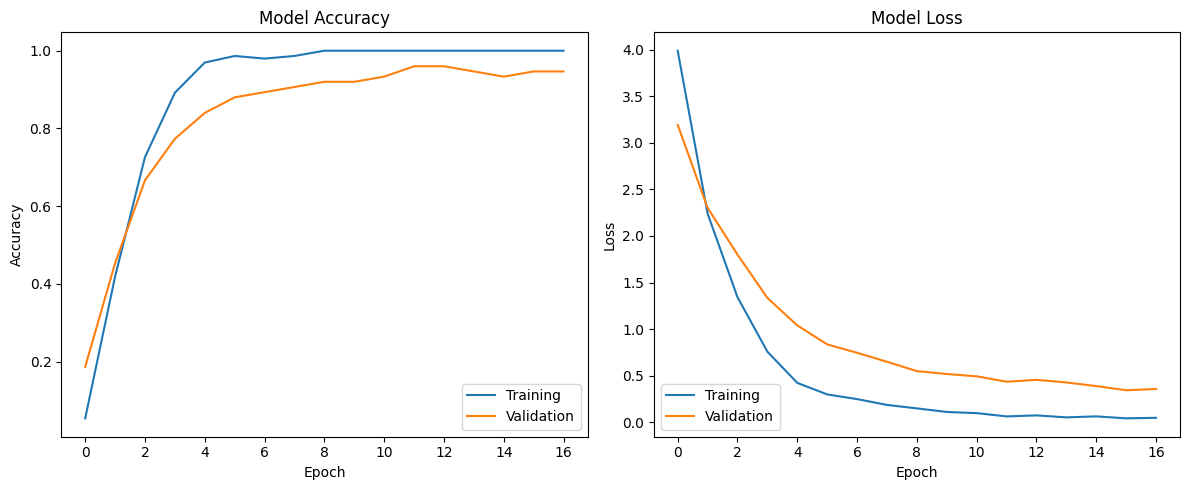

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot Model accuracy
axes[0].plot(fit_hist.history['accuracy'])
axes[0].plot(fit_hist.history['val_accuracy'])
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Training', 'Validation'], loc='lower right')

# Plot Model loss
axes[1].plot(fit_hist.history['loss'])
axes[1].plot(fit_hist.history['val_loss'])
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Training', 'Validation'], loc='lower left')

plt.tight_layout()
plt.show()

Nakon završetka treninga, korišćenjem funkcije `load_model` iz biblioteke tensorflow.keras.models, učitava se prethodno sačuvan najbolji model iz datoteke "model.h5", on predstavlja i konačan model.

In [ ]:
from tensorflow.keras import models as tf_models

model = tf_models.load_model('model.h5')

## Evaluacija modela i analiza rezultata

Nakon što se prethodno obučeni model učitao, koristi se funkcija `evaluate` kako bi se procenile performanse modela na validacionom skupu podataka. Prosleđuju se normalizovane slike `X_val_normalized` i odgovarajuće konvertovane oznake `y_val_converted`. Kroz ovu evaluaciju, dobijaju se vrednosti gubitka (loss) i tačnosti (accuracy) modela.

Nakon evaluacije, rezultati se ispisuju koristeći funkciju `print`. Ispisuje se vrednost gubitka (Test loss) i tačnost (Test accuracy) na validacionom skupu podataka.

Ovi rezultati pružaju uvid u performanse modela na novim, neviđenim podacima i pomažu pri proceni koliko dobro model generalizuje naučene karakteristike i klasifikuje Lego figurice karaktera.

In [ ]:
loss, accuracy = model.evaluate(X_val_normalized, y_val_converted, verbose=1)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

3/3 [==============================] - 13s 3s/step - loss: 0.4337 - accuracy: 0.9600
Test loss: 0.4337391257286072
Test accuracy: 0.9599999785423279


Nakon evaluacije, pripremljene test slike za predikciju se smeštaju u `batch_images`. Za predviđanje klasa Lego figura na tim slikama koristi se prethodno učitan model. Pomoću petlje, prolazi se kroz slike i prikazuju se. Za svaku sliku, izvršava se predikcija korišćenjem modela i dobija se verovatnoća pripadnosti različitim klasama. Odabira se klasa sa najvećom verovatnoćom i prikazuje se kao predikcija. Takođe, prikazuje se i stvarna klasa i ime slike za poređenje.

Pri ispisu uz svaku sliku, dodaju se tekstualne oznake koje prikazuju predikciju i stvarnu vrednost. Oznake se prikazuju u zelenoj boji ako je predikcija tačna, a u crvenoj boji ako nije. Ove informacije pomažu pri vizuelnoj proceni uspešnosti modela u klasifikaciji Lego figura na testnom skupu podataka.

3/3 [==============================] - 15s 4s/step


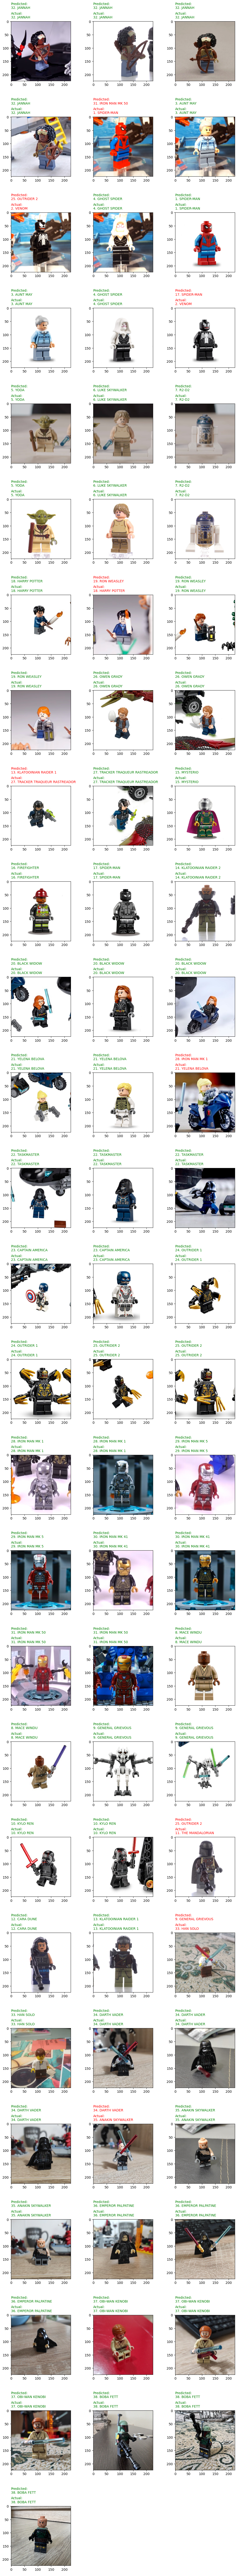

In [ ]:
import math

# Determine the number of rows and columns for the grid
num_images = len(test_csv)
num_rows = math.ceil(num_images / 3)  # Round up to the nearest integer
num_cols = min(num_images, 3)

# Create the figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4*num_rows))

# Prepare the images for batch prediction
batch_images = np.zeros((num_images, 224, 224, 3), dtype=np.float32)
for i, img_path in enumerate(test_data['path'].values):
    image = cv2.imread(img_path)
    image = cv2.resize(image, dsize=(224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) / 255
    batch_images[i] = image

# Predict the whole batch
predictions = model.predict(batch_images)

# Loop through the images and display them in the grid
for i, ax in enumerate(axes.flat):
    if i >= num_images:
        ax.axis('off')
        continue

    image = batch_images[i]
    ax.imshow(image)

    ans = predictions[i].argmax() + 1
    minifigure = metadata_csv.loc[metadata_csv['class_id'] == ans, 'minifigure_name'].iloc[0]

    axcolor = 'green' if str(ans) == str(test_data_labeled['class_id'].values[i]) else 'red'
    ax.text(0, 1.21, f"Predicted:\n{ans}. {minifigure}", transform=ax.transAxes, fontsize=10, color=axcolor)
    ax.text(0, 1.05, f"Actual:\n{test_data_labeled['class_id'].values[i]}. {test_data_labeled['minifigure_name'].values[i]}", transform=ax.transAxes, fontsize=10, color=axcolor)

plt.tight_layout()
plt.show()


## Zaključak

U ovom projektu izvršena je i detaljno opisana primena DenseNet121 modela iz Keras aplikacija za klasifikaciju Lego figura. Pri istraživanju modela za klasifikaciju datih podataka DenseNet121 se istakao po efikasnosti, preciznosti i sposobnosti da nauči specifične karakteristike slika. Priprema podataka, uključujući normalizaciju i obradu slika, pokazala se kao ključna za postizanje visoke tačnosti klasifikacije. Implementirani model može imati praktičnu korisnost u industriji zabave, kolekcionarstvu i mašinskom učenju, olakšavajući prepoznavanje i organizaciju Lego figura. Ovaj rad pruža temelje za dalje istraživanje i unapređenje modela klasifikacije slika u različitim domenima gde je prepoznavanje objekata na slikama od velike važnosti.

## Literatura

* Materijali sa vežbi iz predmeta Principi prezentacije i prepoznavanja oblika (https://github.com/MarkoArsenovic/PPPO2021)
* Architecture of DenseNet-121 (https://iq.opengenus.org/architecture-of-densenet121)
* Keras DenseNet121 (https://keras.io/api/applications/densenet/#densenet121-function)
* Model training APIs (https://keras.io/api/models/model_training_apis)
* Serialization and saving (https://www.tensorflow.org/guide/keras/serialization_and_saving)
* Early Stopping (https://keras.io/api/callbacks/early_stopping)
* Model Checkpoint (https://keras.io/api/callbacks/model_checkpoint)

